<a href="https://colab.research.google.com/github/kulsrana30/Competitive-Programming/blob/master/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# !pip install tensorflow-gpu

In [64]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [65]:
# import basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [67]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
dataset.shape

(10000, 14)

In [69]:
## divide the dataset into independt and dependent faeture
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [70]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [71]:
## feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [72]:
# concatenate these variables with datadrame
X=X.drop(['Geography','Gender'],axis=1)

In [75]:
X=pd.concat([X,geography,gender],axis=1)

In [76]:
# splitting the sataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=0)

In [77]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [78]:
X_train.shape

(8000, 14)

In [79]:
## part2 lets create ANN

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [81]:
## lets inti the ANN
classifier=Sequential()

In [82]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [83]:
# adding the hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [84]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [85]:
# addinng the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [89]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [90]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 6s 6ms/step - loss: 0.4908 - accuracy: 0.7960 - val_loss: 0.4381 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4573 - accuracy: 0.8016 - val_loss: 0.4350 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4442 - accuracy: 0.8102 - val_loss: 0.4128 - val_accuracy: 0.8179
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4302 - accuracy: 0.8177 - val_loss: 0.4000 - val_accuracy: 0.8239
Epoch 5/100
536/536 [==============================] - 4s 8ms/step - loss: 0.4197 - accuracy: 0.8194 - val_loss: 0.3948 - val_accuracy: 0.8232
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4238 - accuracy: 0.8237 - val_loss: 0.3889 - val_accuracy: 0.8319
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4207 - accuracy: 0.8222 - val_loss: 0.3977 - val_accuracy: 0.8092

In [92]:
### early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [93]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3998 - accuracy: 0.8281 - val_loss: 0.3744 - val_accuracy: 0.8395
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3958 - accuracy: 0.8259 - val_loss: 0.3854 - val_accuracy: 0.8398
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3994 - accuracy: 0.8252 - val_loss: 0.3746 - val_accuracy: 0.8391
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3954 - accuracy: 0.8265 - val_loss: 0.3750 - val_accuracy: 0.8497
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3906 - accuracy: 0.8235 - val_loss: 0.3763 - val_accuracy: 0.8470
Epoch 6/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3978 - accuracy: 0.8289 - val_loss: 0.3697 - val_accuracy: 0.8463
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3882 - accuracy: 0.8294 - val_loss: 0.3722 - val_accuracy: 0.8368

In [94]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

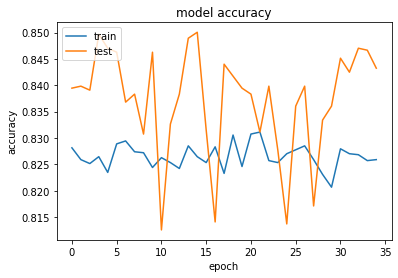

In [95]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

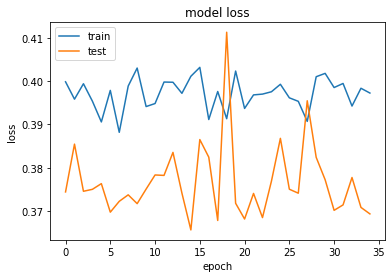

In [96]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [98]:
# make the confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1569,   26],
       [ 267,  138]])

In [99]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [100]:
score

0.8535

In [101]:
### get the weight
classifier.get_weights()

[array([[ 5.86364150e-01, -6.85933709e-01, -5.85532486e-01,
          8.92723441e-01,  1.19774556e+00, -3.53332251e-01,
         -2.01053306e-01, -2.69979596e-01, -8.44610274e-01,
         -1.98428929e-01, -5.35687983e-01],
        [-6.35633802e+00,  3.26550126e+00,  1.80145490e+00,
         -1.01759565e+00, -6.45621443e+00, -4.94958210e+00,
          1.08470666e+00,  1.37723875e+00, -6.49287987e+00,
         -1.45725048e+00,  1.90835667e+00],
        [-3.94358754e-01,  8.79014969e-01, -1.57405268e-02,
          8.39530945e-01, -1.66703209e-01, -3.52461226e-02,
          1.02723092e-01,  2.46774301e-01,  1.67729914e-01,
          1.50146747e+00, -1.58953033e-02],
        [-1.76780069e+00, -4.11870569e-01, -4.52673721e+00,
         -2.76632404e+00, -1.97830439e+00, -1.93761683e+00,
          8.21928799e-01,  8.91482592e-01, -1.49614060e+00,
         -3.82913780e+00, -4.09243250e+00],
        [ 9.78619337e-01,  6.77330256e-01, -7.24906349e+00,
          4.77543861e-01, -4.61533442e-02,  